In [ ]:
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [ ]:
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

## Case 1 : Would use Word2Vec and then apply different classifiers
from gensim.models import Word2Vec  

## Case 2 : Would use TfidfVectorizer and then apply different classifiers
from sklearn.feature_extraction.text import TfidfVectorizer   

## This would help us understand : Does the type of Vectorizing Process influence the precision , accuracy , recall score of the classifiers ??

from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
import warnings
warnings.filterwarnings("ignore")

In [ ]:
pip install -U statsmodels

Requirement already up-to-date: statsmodels in /usr/local/lib/python3.6/dist-packages (0.12.0)


In [ ]:
pip install seaborn

SHAPE OF DATASET:  (7471, 3) 

COLUMNS IN DATASET:  Index(['Polarity', 'UserComments', 'Polarity_type'], dtype='object') 

CATEGORIES:  ['Negative' 'Positive'] 

DATA SAMPLE: 

       Polarity                                       UserComments Polarity_type
3279 -0.100000    gadget wide angl macro phone camera lens pc set      Negative
3853  0.295455  new small dreamcatch perfect hang rearview mir...      Positive
7068  0.500000                            sturdi unit otherwis ok      Positive
7003  0.700000                                          look good      Positive
2695 -0.283333  increas traffic volum creat problem citi aroun...      Negative 


NUMBER OF SAMPLES IN EACH CATEGORY: 



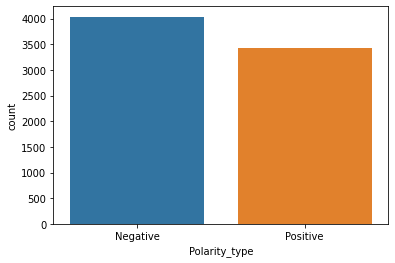

In [ ]:
import seaborn as sns
# Read data frame
file_url = '/content/export_User_Comments_Polarity_Category_clean.xlsx'
df = pd.read_excel(file_url)

## Doing basic EDA ( Exploratory Data Analysis )

# Description of the dataset
print('SHAPE OF DATASET: ', df.shape, '\n\nCOLUMNS IN DATASET: ', df.columns, '\n\nCATEGORIES: ', df.Polarity_type.unique(), '\n\nDATA SAMPLE: \n\n', df.sample(n=5), '\n\n')

# Plotting number of samples within each category
print('NUMBER OF SAMPLES IN EACH CATEGORY: \n')
sns.countplot(df.Polarity_type)

In [ ]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
import re

# DATA CLEANING
print('Data cleaning in progress...')

# Tokenize : dividing Sentences into words
df['text_clean'] = df['UserComments'].apply(nltk.word_tokenize)
print('Tokenization complete.')


# Remove stop words
stop_words=set(nltk.corpus.stopwords.words("english"))
df['text_clean'] = df['text_clean'].apply(lambda x: [item for item in x if item not in stop_words])
print('Stop words removed.')

# Remove numbers, punctuation and special characters (only keep words)
regex = '[a-z]+'
df['text_clean'] = df['text_clean'].apply(lambda x: [item for item in x if re.match(regex, item)])
print('Numbers, punctuation and special characters removed.')


# Lemmatization : lemma means base form of a word.  // Example : leaf and leaves get lemmatized to leaf
lem = nltk.stem.wordnet.WordNetLemmatizer()
df['text_clean'] = df['text_clean'].apply(lambda x: [lem.lemmatize(item, pos='v') for item in x])
print('Lemmatization complete.\nData cleaning complete.\n')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
Data cleaning in progress...
Tokenization complete.
Stop words removed.
Numbers, punctuation and special characters removed.
Lemmatization complete.
Data cleaning complete.



In [ ]:
df

,Polarity,UserComments,Polarity_type,text_clean
0,0.0,bought projector clueless connect iphon,Negative,"[buy, projector, clueless, connect, iphon]"
1,0.0,promis multi card reader leav review im still ...,Negative,"[promis, multi, card, reader, leav, review, im..."
2,0.0,hello apeman team respond email fix issu multi...,Negative,"[hello, apeman, team, respond, email, fix, iss..."
3,0.8,great pictur excit look k camerajust need pric...,Positive,"[great, pictur, excit, look, k, camerajust, ne..."
4,0.0,bought apeman dashcam find rear camer cabl met...,Negative,"[buy, apeman, dashcam, find, rear, camer, cabl..."
...,...,...,...,...
7466,0.0,inch dash camera mirrorwhatsappwechat autobrig...,Negative,"[inch, dash, camera, mirrorwhatsappwechat, aut..."
7467,0.3,see fun begin xboxnintendoswitch playstat,Positive,"[see, fun, begin, xboxnintendoswitch, playstat]"
7468,0.0,inch fhd p dvr camera recorderwhatsappwechat a...,Negative,"[inch, fhd, p, dvr, camera, recorderwhatsappwe..."
7469,0.0,autobrighttech autobrighttech caraccessori aut...,Negative,"[autobrighttech, autobrighttech, caraccessori,..."


In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

# TF-IDF

In [ ]:
# Classification using TFIDF vectorizer

# Vectorize training and testing data. Here we would pass TfidfVectorizer() to vec 
def Vectorize(vec, X_train, X_test):    
    
    X_train_vec = vec.fit_transform(X_train)
    X_test_vec = vec.transform(X_test)
    
    print('Vectorization complete.\n')
    
    return X_train_vec, X_test_vec

# Use multiple classifiers and grid search for prediction
def ML_modeling(models, params, X_train, X_test, y_train, y_test):    
    
    if not set(models.keys()).issubset(set(params.keys())):
        raise ValueError('Some estimators are missing parameters')

    for key in models.keys():
    
        model = models[key]
        param = params[key]
        gs = GridSearchCV(model, param, cv=5, error_score=0, refit=True)
        gs.fit(X_train, y_train)
        y_pred = gs.predict(X_test)
        
        # Print scores for the classifier
        print(key, ':', gs.best_params_)
        print("Accuracy: %1.3f \tPrecision: %1.3f \tRecall: %1.3f \t\tF1: %1.3f\n" % (accuracy_score(y_test, y_pred), precision_score(y_test, y_pred, average='macro'), recall_score(y_test, y_pred, average='macro'), f1_score(y_test, y_pred, average='macro')))
    
    return

## Preparing to make a pipeline 
models = {
    'Naive Bayes': MultinomialNB(), 
    'Decision Tree': DecisionTreeClassifier(),
    'Perceptron': MLPClassifier(),
    'Gradient Boosting': GradientBoostingClassifier()   ## This model would take a little longer to run 
}

params = {
    'Naive Bayes': { 'alpha': [0.5, 1], 'fit_prior': [True, False] }, 
    'Decision Tree': { 'min_samples_split': [1, 2, 5] },
    'Perceptron': { 'alpha': [0.0001, 0.001], 'activation': ['tanh', 'relu'] },
    'Gradient Boosting': { 'learning_rate': [0.05, 0.1], 'min_samples_split': [2, 5] }
}

# Encode label categories to numbers
enc = LabelEncoder()
df['Polarity_type'] = enc.fit_transform(df['Polarity_type'])
labels = list(enc.classes_)

# Train-test split and vectorize
X_train, X_test, y_train, y_test = train_test_split(df['UserComments'], df['Polarity_type'], test_size=0.2, shuffle=True)
X_train_vec, X_test_vec = Vectorize(TfidfVectorizer(), X_train, X_test)

ML_modeling(models, params, X_train_vec, X_test_vec, y_train, y_test)
## ML_modeling method also prints performance scores for each classifier

Vectorization complete.

Naive Bayes : {'alpha': 1, 'fit_prior': True}
Accuracy: 0.783 	Precision: 0.789 	Recall: 0.776 		F1: 0.778

Decision Tree : {'min_samples_split': 2}
Accuracy: 0.847 	Precision: 0.846 	Recall: 0.845 		F1: 0.846

Perceptron : {'activation': 'relu', 'alpha': 0.001}
Accuracy: 0.805 	Precision: 0.804 	Recall: 0.804 		F1: 0.804

Gradient Boosting : {'learning_rate': 0.1, 'min_samples_split': 5}
Accuracy: 0.833 	Precision: 0.869 	Recall: 0.820 		F1: 0.824



Ref: https://www.kaggle.com/rockystats/bbc-text-classification-word2vec-vs-tf-idf